In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
from csv import writer
import math
import cmath
import pickle

import tensorflow as tf
from tensorflow import keras
from keras.models import Model,Sequential,load_model
from keras.layers import Input, Embedding
from keras.layers import Dense, Bidirectional
from keras.layers.recurrent import LSTM
import keras.metrics as metrics
import itertools
from tensorflow.python.keras.utils.data_utils import Sequence
from decimal import Decimal
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense

In [2]:
A1=np.empty((0,5),dtype='float32')
U1=np.empty((0,7),dtype='float32')
node=['150','149','147','144','142','140','136','61']
mon=['Apr','Mar','Aug','Jun','Jul','Sep','May','Oct']
for j in node:
  for i in mon:
    inp= pd.read_csv('../../data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[1,2,3,15,16],low_memory=False)
    out= pd.read_csv('../../data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[5,6,7,8,17,18,19],low_memory=False)
    
    inp=np.array(inp,dtype='float32')
    out=np.array(out,dtype='float32')
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90401e+05 7.25000e+02 2.75500e+01 8.03900e+01]
 [1.50000e+02 1.90401e+05 8.25000e+02 2.75600e+01 8.03300e+01]
 [1.50000e+02 1.90401e+05 9.25000e+02 2.75800e+01 8.02400e+01]
 ...
 [6.10000e+01 1.91020e+05 1.94532e+05 2.93700e+01 7.52100e+01]
 [6.10000e+01 1.91020e+05 1.94632e+05 2.93500e+01 7.52700e+01]
 [6.10000e+01 1.91020e+05 1.94732e+05 2.93400e+01 7.53000e+01]]
[[ 28.     3.   -52.   ...  16.97  19.63  20.06]
 [ 28.    15.   -53.   ...  16.63  19.57  23.06]
 [ 31.    16.   -55.   ...  17.24  19.98  20.24]
 ...
 [ 76.    12.   -76.   ...   3.47   3.95   4.35]
 [ 75.    13.   -76.   ...   3.88   4.33   4.42]
 [ 76.    12.   -75.   ...   3.46   4.07   4.28]]


In [3]:
from sklearn.decomposition import PCA
import warnings
scaler_obj1=PCA()
scaler_obj2=PCA()
X1=scaler_obj1.fit_transform(A1)
Y1=scaler_obj2.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

In [4]:
from Hybrid_Model import HybridModel
# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.25,random_state=42)

hybrid_model=HybridModel()

Utkarsh


In [5]:
hybrid_model.load_models()

Loading XGboost Model.........
Completed............100%
Loading Randomforest Model.........
Completed............100%
Loading Randomforest Model.........
Completed............100%
Loading Linear Regression Model.........
Completed............100%
Loading Lasso Regression Model.........
Completed............100%
Loading Cnn Model.........
Loaded model from disk
Completed............100%
Loading LSTM Model.........
Loaded model from disk
Completed............100%
Loading GRU Model.........
Loaded model from disk
Completed............100%


In [6]:

hybrid_model.fit_machine_learning_model(x_test,y_test)

In [7]:
new_x_test=x_test[:,np.newaxis,:]
new_y_test=y_test[:,np.newaxis,:]

In [8]:
hybrid_model.fit_neural_network_model(new_x_test,new_y_test)

In [9]:
res=hybrid_model.predict()
res

array([[ 0.00000000e+00,  1.78758085e-01,  3.64695734e-04, ...,
        -3.13640404e+01, -6.45188570e-01,  2.36403048e-01],
       [ 0.00000000e+00,  1.78758085e-01,  3.64695734e-04, ...,
        -2.49135189e+01,  4.55486953e-01,  4.88306023e-03],
       [ 0.00000000e+00,  1.78758085e-01,  3.64695734e-04, ...,
        -3.06105494e+00, -3.35961014e-01,  4.45987796e-03],
       ...,
       [ 2.28988528e-02,  8.09071600e-01,  9.99599636e-01, ...,
         5.48685837e+01, -1.17037535e+00, -4.91316140e-01],
       [ 0.00000000e+00,  1.78758085e-01,  3.64695734e-04, ...,
        -2.22992821e+01, -1.31082714e+00, -2.10837990e-01],
       [ 0.00000000e+00,  1.78758085e-01,  3.64695734e-04, ...,
        -2.22930317e+01,  3.38213801e+00,  2.81120479e-01]])

In [10]:
df2=pd.DataFrame(y_test)
df2.head(5)

,0,1,2,3,4,5,6
0,-55.306183,30.651539,268.098175,-41.668770,-32.125660,-0.600415,0.356376
1,-40.849674,-32.327366,40.117168,29.317490,-16.759521,-0.434787,-0.474494
2,-53.128677,6.376891,-544.893494,3.284044,22.194275,4.739912,-0.931445
3,-86.316681,31.737486,1142.098022,10.382132,41.767384,0.364958,-1.085558
4,-36.745415,-46.528584,-607.878418,33.279778,-22.209949,-0.499987,0.318073


In [11]:
df=pd.DataFrame(res)
df.head(5)

,0,1,2,3,4,5,6
0,0.000000,0.178758,0.000365,0.892267,-31.364040,-0.645189,0.236403
1,0.000000,0.178758,0.000365,0.892267,-24.913519,0.455487,0.004883
2,0.000000,0.178758,0.000365,0.892267,-3.061055,-0.335961,0.004460
3,0.022899,0.809072,0.999600,0.098099,12.727272,0.919441,-0.689324
4,0.000000,0.178758,0.000365,0.892267,-26.911499,-0.154045,0.313782


In [14]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score_value=r2_score(y_test,res,multioutput='variance_weighted')
mae_value=mean_absolute_error(y_test,res)
mse_value=mean_squared_error(y_test,res)
rmse_value=np.sqrt(mse_value)
print("R2 score:",r2_score_value)
print("Mean absolute error:",mae_value)
print("Mean Squared Error:",mse_value)
print("Root Mean Squared Error:",rmse_value)

R2 score: -0.0003218848950020425
Mean absolute error: 71.21392032325416
Mean Squared Error: 1431785.33584029
Root Mean Squared Error: 1196.5723278767105


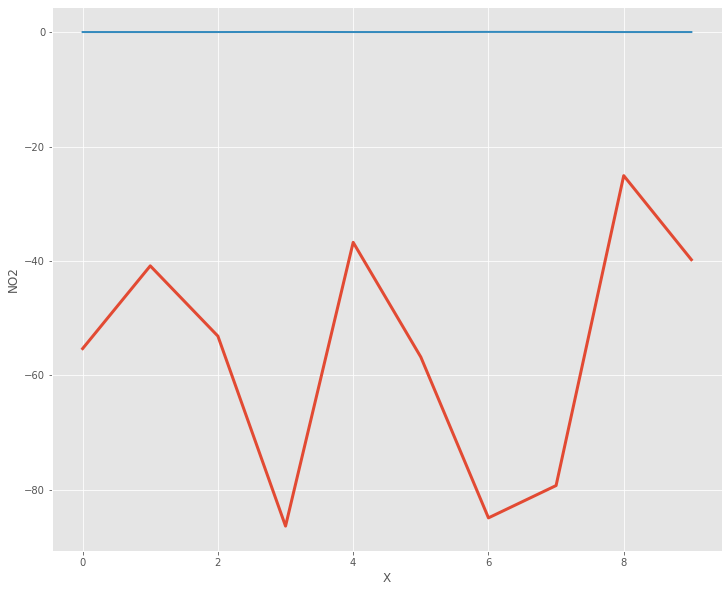

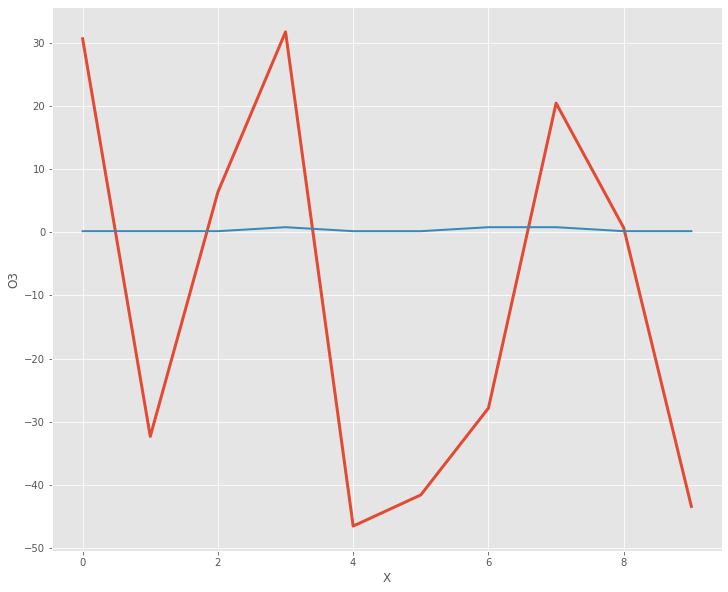

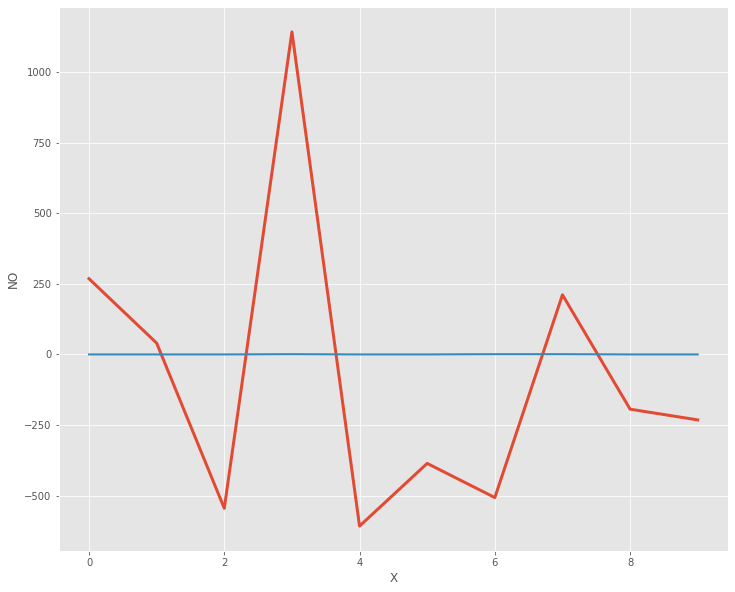

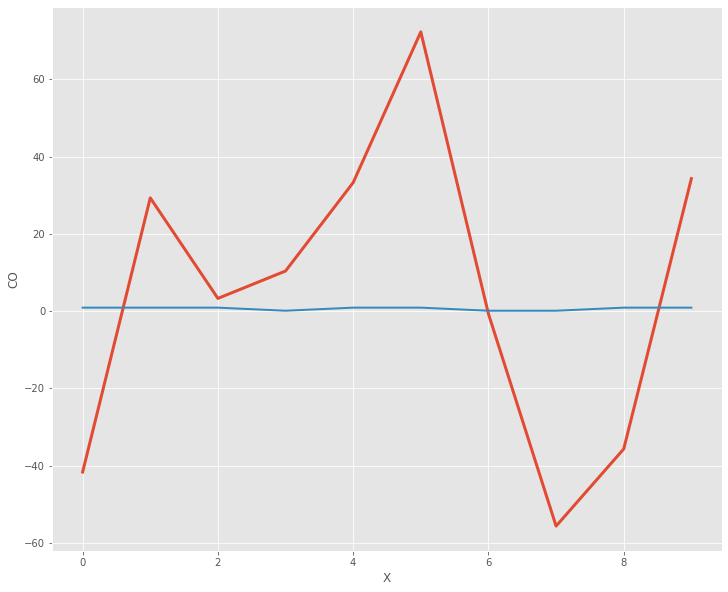

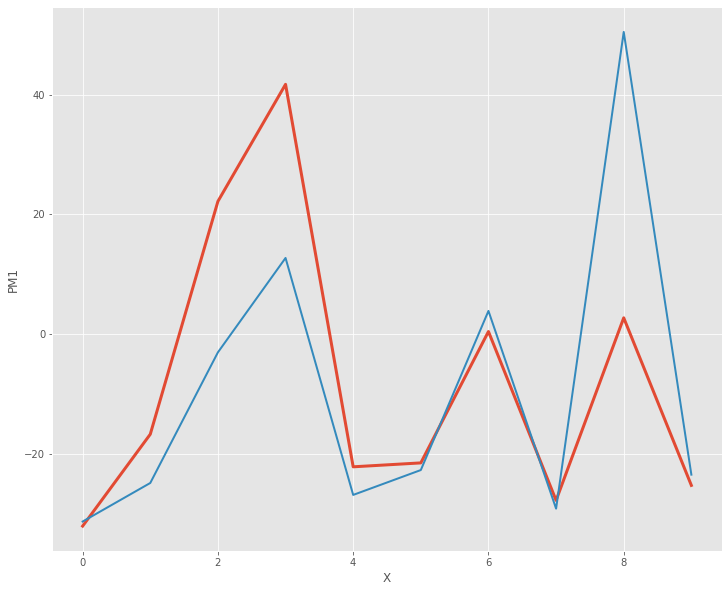

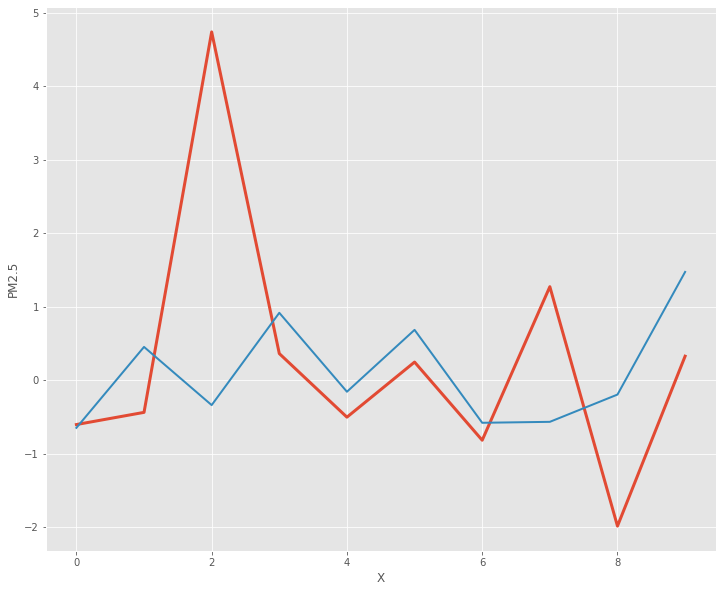

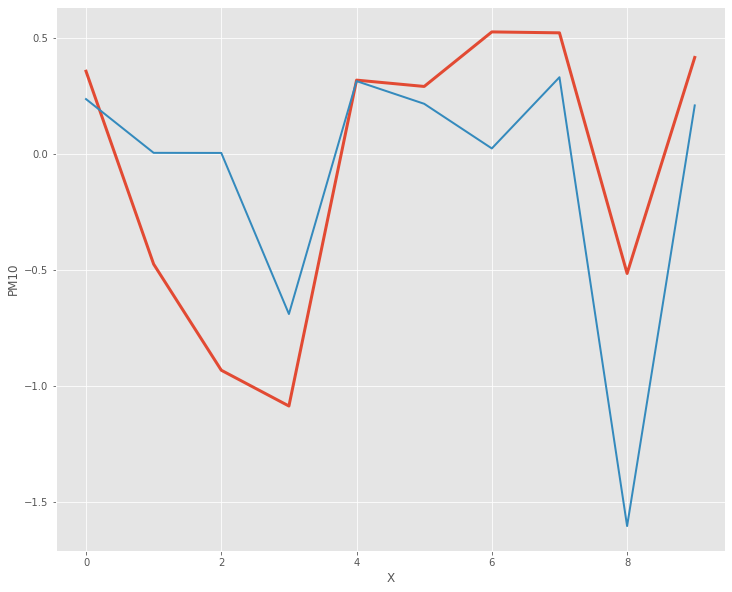

In [13]:
from matplotlib import style
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']
style.use('ggplot')
for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:10,i],linewidth=3, markersize=12)
  plt.plot(res[:10,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()


In [ ]:
#completed